In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv("refactored_foods.csv")
df = df.iloc[:841,:]
df

,image nr,Description,Food classification,"Complexity (amount, number of items)",Natural vs transformed,Sweet vs savory,State of food,Food vs nonfood,FPC,S,...,Average_Health_JP,St._dev_Health_JP,Average_Desire_ALL,St_dev_Desire_ALL,Average_Desire_UK,St_dev_Desire_UK,Average_Desire_US,St_dev_Desire_US,Average_Desire_JP,St_dev_Desire_JP
0,1,Oranges,Universal,2,Natural,Sweet,Raw,Food,0.2439,4.6617,...,80.47,12.07,65.09,26.50,63.73,27.00,65.85,29.62,65.38,22.61
1,2,Apples,Universal,3,Natural,Sweet,Raw,Food,0.3338,5.0094,...,74.32,19.22,63.08,28.46,61.32,27.19,69.23,29.35,59.06,28.88
2,3,Apple + parts,Universal,12,Natural,Sweet,Raw,Food,0.4168,4.9397,...,81.77,17.19,67.19,25.45,65.29,23.37,70.29,25.22,65.09,27.61
3,4,Appleparts,Universal,11,Natural,Sweet,Raw,Food,0.3115,4.7412,...,79.14,14.95,63.19,30.16,60.31,32.57,66.58,30.27,63.22,27.77
4,5,Grasshopper,Unappealing,50,Natural,Savory,NaN,Food,0.3107,4.9059,...,47.59,29.74,13.11,21.99,14.66,25.69,18.79,26.14,6.29,9.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,837,pepernoten (gingernuts) - large portion,Western,NaN,NaN,NaN,NaN,Food,0.5194,4.8716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,838,candied orange parts,Western,NaN,NaN,NaN,NaN,Food,0.2015,4.6495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,839,candied lemon parts,Western,NaN,NaN,NaN,NaN,Food,0.2236,4.6280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839,840,candied orange and lemon parts,Western,NaN,NaN,NaN,NaN,Food,0.2320,4.6863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop('image nr', axis=1)

df = df[df['Food vs nonfood'] == "Food"]
df = df.drop('Food vs nonfood', axis=1)
df = df.drop('State of food', axis=1)
df = df[df['Food classification'] != 'Unappealing']
df = df[df['Food classification'] !=  'African']
#df = df.dropna(subset=['S'],how='all')
df.reset_index(drop=True,inplace=True)
#df = df.iloc[:,0:27]
df['Food classification'].value_counts()

Asian        301
Western      211
Universal    157
Name: Food classification, dtype: int64

In [11]:
def standardize_classification(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Universal":
        return 0
    elif item == "Western":
        return 1
    elif item == "Asian":
        return 2

def standardize_natural(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Natural":
        return 1
    else:
        return 0
    
def standardize_flavor(item):
    if (not isinstance(item, float)) and (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Savory":
        return 1
    else:
        return 0
    
def standardize_complexity(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif (item == "Complex") or (item == "complex"):
        return 10
    elif (int(item) >= 10):
        return 10
    else:
        return item

In [12]:
df['Food classification'] = df['Food classification'].apply(lambda x: standardize_classification(x))
df['Natural vs transformed'] = df['Natural vs transformed'].apply(lambda x: standardize_natural(x))
df['Sweet vs savory'] = df['Sweet vs savory'].apply(lambda x: standardize_flavor(x))
df['Complexity (amount, number of items)'] = df['Complexity (amount, number of items)'].apply(lambda x: standardize_complexity(x))
df

,Description,Food classification,"Complexity (amount, number of items)",Natural vs transformed,Sweet vs savory,FPC,S,P,C,E,...,Average_Health_JP,St._dev_Health_JP,Average_Desire_ALL,St_dev_Desire_ALL,Average_Desire_UK,St_dev_Desire_UK,Average_Desire_US,St_dev_Desire_US,Average_Desire_JP,St_dev_Desire_JP
0,Oranges,0,2,1.0,0,0.2439,4.6617,63.8553,0.0240,0.3480,...,80.47,12.07,65.09,26.50,63.73,27.00,65.85,29.62,65.38,22.61
1,Apples,0,3,1.0,0,0.3338,5.0094,65.4004,0.0410,0.3381,...,74.32,19.22,63.08,28.46,61.32,27.19,69.23,29.35,59.06,28.88
2,Apple + parts,0,10,1.0,0,0.4168,4.9397,66.8784,0.0567,0.3492,...,81.77,17.19,67.19,25.45,65.29,23.37,70.29,25.22,65.09,27.61
3,Appleparts,0,10,1.0,0,0.3115,4.7412,66.0402,0.0433,0.3878,...,79.14,14.95,63.19,30.16,60.31,32.57,66.58,30.27,63.22,27.77
4,Crostini,1,1,0.0,1,0.1735,4.5275,68.3825,0.0502,0.3765,...,33.31,22.19,28.19,26.71,33.91,33.47,21.20,19.05,29.92,25.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,pepernoten (gingernuts) - large portion,1,NaN,NaN,0,0.5194,4.8716,69.7927,0.0849,0.2669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,candied orange parts,1,NaN,NaN,0,0.2015,4.6495,68.2387,0.0442,0.3530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,candied lemon parts,1,NaN,NaN,0,0.2236,4.6280,67.1906,0.0418,0.3690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,candied orange and lemon parts,1,NaN,NaN,0,0.2320,4.6863,67.3786,0.0420,0.3535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#df2[df2.isnull().any(axis=1)]

temp = df
temp = df[df['Average_Health_JP'].notna() & df['St._dev_Health_JP'].notna()]
temp

#nah = df[df.isnull().any(axis=1)]
#nah

imp = IterativeImputer(max_iter=1, n_nearest_features=10, sample_posterior=True, random_state=0)
imp.fit(temp.iloc[:,2:])
#test = df.iloc[478:, 5:]
idk = imp.transform(df.iloc[:,2:])
idk

array([[ 2.        ,  1.        ,  0.        , ..., 29.62      ,
        65.38      , 22.61      ],
       [ 3.        ,  1.        ,  0.        , ..., 29.35      ,
        59.06      , 28.88      ],
       [10.        ,  1.        ,  0.        , ..., 25.22      ,
        65.09      , 27.61      ],
       ...,
       [ 0.62804252,  0.20028784,  0.        , ..., 25.29465785,
        37.72688197, 21.37435378],
       [ 7.5181636 ,  1.2769593 ,  0.        , ..., 21.12246917,
        45.48414175, 32.33294373],
       [10.        ,  0.        ,  1.        , ..., 32.4570112 ,
        56.08755666, 24.19043815]])

In [14]:
df2 = pd.DataFrame(idk)
df2.iloc[400:600,:]

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
400,2.0,0.0,1.0,0.1238,4.4873,65.5078,0.0331,0.3791,0.9857,0.3909,...,30.250000,17.710000,43.140000,29.070000,44.940000,28.940000,40.190000,27.590000,44.250000,31.260000
401,1.0,0.0,1.0,0.1885,4.3013,67.5732,0.0459,0.3548,0.9794,0.3731,...,47.230000,19.450000,30.160000,27.260000,18.580000,18.600000,17.780000,23.100000,53.830000,22.510000
402,1.0,0.0,1.0,0.1934,4.2658,67.2655,0.0456,0.3571,0.9800,0.3412,...,44.330000,19.970000,29.940000,26.080000,14.840000,16.430000,27.500000,25.140000,49.130000,24.200000
403,1.0,0.0,1.0,0.2413,4.5896,69.9913,0.0700,0.3306,0.9703,0.3825,...,31.590000,18.880000,35.880000,29.150000,25.820000,26.010000,27.690000,28.110000,54.440000,24.720000
404,6.0,0.0,1.0,0.2905,4.6286,69.7583,0.0738,0.3180,0.9677,0.4213,...,36.290000,17.260000,54.120000,27.520000,50.870000,28.560000,54.740000,26.900000,56.480000,27.870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,10.0,0.0,1.0,0.2633,4.6314,67.1268,0.0423,0.3498,0.9824,0.4212,...,11.812029,14.664712,42.358852,28.583947,36.826444,24.219015,48.740215,29.016436,38.537105,20.765573
596,10.0,0.0,1.0,0.3122,4.8008,68.0802,0.0565,0.3415,0.9768,0.4433,...,56.606331,21.509618,40.631197,27.076104,35.019022,21.605017,40.008779,34.180720,38.733592,21.489490
597,3.0,0.0,1.0,0.2059,4.4367,70.8373,0.0647,0.3325,0.9805,0.3752,...,49.591636,17.825928,41.925659,27.693408,40.504188,23.611647,35.929925,35.619151,49.301968,29.927117
598,2.0,0.0,1.0,0.1896,4.4448,69.5990,0.0523,0.3361,0.9837,0.3202,...,59.460818,18.995409,43.243346,28.588286,43.040070,26.861705,39.450388,23.978923,39.712372,25.650683


In [15]:
#df.iloc[400:600,:]
# desc = df.Description
# df2.insert(0, 'Description', desc)

In [29]:
X = df2.transpose()
pca = PCA(n_components=2)
pca.fit(X)
pca.components_
pcaDf = pd.DataFrame(pca.components_).transpose()
pcaDf

,0,1
0,0.034000,0.060567
1,0.067688,-0.012750
2,0.063357,0.000568
3,0.054976,0.013697
4,0.038579,-0.011190
...,...,...
664,0.022969,0.042854
665,0.036502,0.008593
666,0.035560,0.015915
667,0.051682,-0.013654


array([[ 0.0373556 ,  0.00760855],
       [ 0.0227695 ,  0.04331212],
       [ 0.06807812, -0.05730044]])

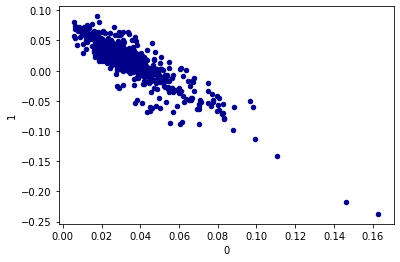

In [31]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pcaDf)
pcaDf.plot.scatter(x=0, y=1, c='DarkBlue')
kmeans.cluster_centers_